In [65]:
import itertools

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.wordnet import WordNetLemmatizer

import random
import re

import string

In [32]:
wn = WordNetLemmatizer()

In [14]:
#https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

text_file = open('novels/novel_one.txt', 'r')
text = text_file.read()

In [78]:
stopwords = nltk.corpus.stopwords.words('english')

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

word_list = clean_text(text)

def lemmatize(tokenized_list):
    for idx, word in enumerate(tokenized_list):
        lemma = wn.lemmatize(word)
        tokenized_list[idx] = lemma
    return tokenized_list

data = lemmatize(word_list)

from nltk import FreqDist
fdist = FreqDist(data)
common_words = fdist.most_common(50)

title_list = []

for _ in itertools.repeat(None, 5):
    word = (random.choice(common_words)[0]).upper()
    title_list.append(word)

    
file_title = ('_'.join(title_list).lower())
title = (' '.join(title_list)).title()

'good_door_conversation_seat_door'

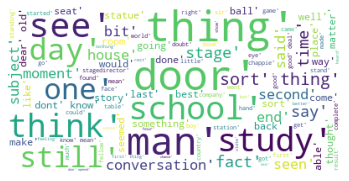

In [75]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='white', 
                      stopwords=stopwords, 
                      max_words=100, max_font_size=50,  
                      random_state=42).generate(str(data))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("novel_1_cover.png", dpi=900)